Import package to visualize results

In [1]:
import matplotlib.pyplot as plt

# Create Balance of Plant (BoP) Model

## Import BoP module

The current version of BLUEMIRA uses the legacy BLUEPRINT BoP module.
This example imports that module and sets examples for both an
HCPB-EUDEMO and a WCLL_EUDEMO.

In [2]:
from bluemira.balance_of_plant.steady_state import (
    BalanceOfPlant,
    H2OPumping,
    HePumping,
    NeutronPowerStrategy,
    ParasiticLoadStrategy,
    PredeterminedEfficiency,
    RadChargedPowerStrategy,
    SuperheatedRankine,
)
from bluemira.base.parameter import ParameterFrame

+-------------------------------------------------------------------------+
| WARNING: PROCESS not installed on this machine; cannot run PROCESS.     |
+-------------------------------------------------------------------------+


## Define General BoP Parameters

The sequence of parameters to define any BoP are as follows:
- reactor power composition;
- coefficients for splitting neutron power;
- coefficients for splitting radiation power;
- coolant, power conversion and parasitic load parameters.

In [3]:
# fmt: off
default_params = ParameterFrame([
    ['P_fus_DT', 'D-T fusion power', 1995, 'MW', None, 'Input'],
    ['P_fus_DD', 'D-D fusion power', 5, 'MW', None, 'Input'],
    ['P_rad', 'Radiation power', 400, 'MW', None, 'Input'],
    ['P_hcd', "Heating and current drive power", 50, "MW", None, 'Input'],
    ['P_hcd_el', "Heating and current drive electrical power", 150, "MW", None, 'Input'],
    ['P_bb_decay', 'Blanket decay heat', 30, 'MW', None, 'Input'],
])
# fmt: on

neutron_power_strat = NeutronPowerStrategy(
    f_blanket=0.9,
    f_divertor=0.05,
    f_vessel=0.04,
    f_other=0.01,
    energy_multiplication=1.35,
)
rad_sep_strat = RadChargedPowerStrategy(
    f_core_rad_fw=0.9,
    f_sol_rad=0.75,
    f_sol_rad_fw=0.8,
    f_sol_ch_fw=0.8,
    f_fw_blk=0.91,
)
blanket_pump_strat = HePumping(8, 7.5, 300, 500, eta_isentropic=0.9, eta_electric=0.87)
bop_cycle = SuperheatedRankine(bb_t_out=500, delta_t_turbine=20)
divertor_pump_strat = H2OPumping(f_pump=0.05, eta_isentropic=0.99, eta_electric=0.87)
parasitic_load_strat = ParasiticLoadStrategy()

## Define Specific BoP Parameters

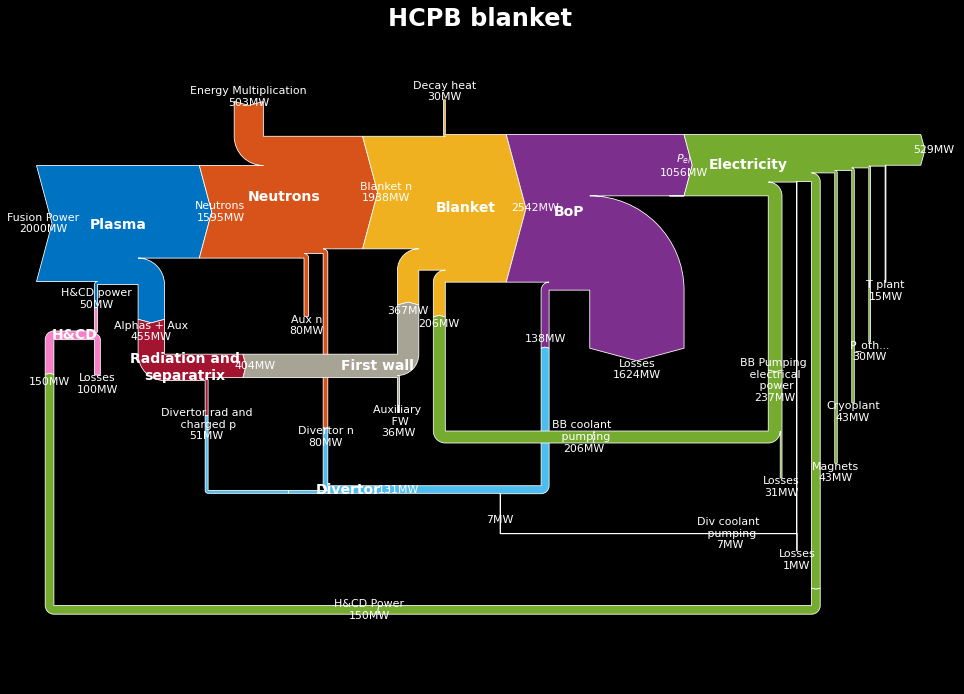

In [4]:
# HCPB architecture
HCPB_bop = BalanceOfPlant(
    default_params,
    rad_sep_strat=rad_sep_strat,
    neutron_strat=neutron_power_strat,
    blanket_pump_strat=blanket_pump_strat,
    divertor_pump_strat=divertor_pump_strat,
    bop_cycle_strat=bop_cycle,
    parasitic_load_strat=parasitic_load_strat,
)
HCPB_bop.build()
HCPB_bop.plot(title="HCPB blanket")


blanket_pump_strat = H2OPumping(0.005, eta_isentropic=0.99, eta_electric=0.87)
bop_cycle = PredeterminedEfficiency(0.33)

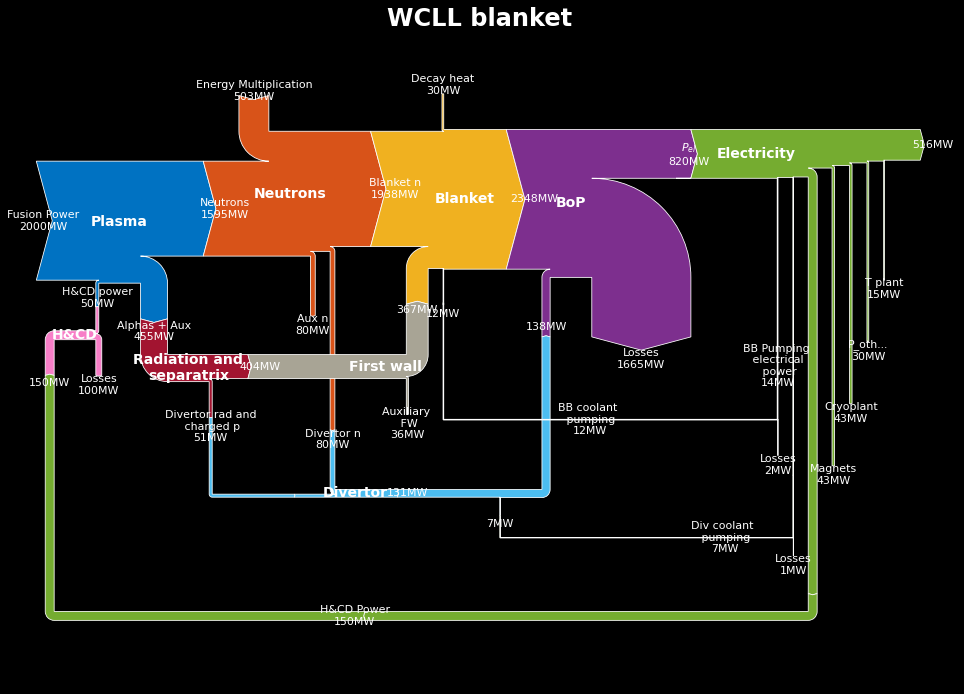

In [5]:
# WCLL architecture
WCLL_bop = BalanceOfPlant(
    default_params,
    rad_sep_strat=rad_sep_strat,
    neutron_strat=neutron_power_strat,
    blanket_pump_strat=blanket_pump_strat,
    divertor_pump_strat=divertor_pump_strat,
    bop_cycle_strat=bop_cycle,
    parasitic_load_strat=parasitic_load_strat,
)
WCLL_bop.build()
WCLL_bop.plot(title="WCLL blanket")

# Visualize the results

In [6]:
plt.show()